<a href="https://colab.research.google.com/github/SRezaA102/MachineLearningTask/blob/main/Minggu9_UTS/9_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS UTS
*   NAMA = Syahrul Reza Ananda
*   NIM = 1103210113
*   Model = Random Forest
*   Dataset = test.csv & trains.csv

# **Promp Chat-GPT**
1. Apa yang harus saya lakuka
2. Bersihkan data tersebut (berisikan informasi tabel)
3. Buatkan Feature Engineeringnya
4. Buatkan Model datasetnya menggunakan random forest dan Evaluasi Modelnya

# **Import Library**

In [48]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# **Memuat Dataset**

---

In [49]:
#Lokasi Alamat CSV
url2 = "/content/drive/MyDrive/Machine Learning/Minggu 9/train.csv"

# Membaca file CSV
datatrain = pd.read_csv(url2)

<ipython-input-49-81c84b4b82dd>:5: DtypeWarning:

Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.



## **Mengecek Isi Dataset**

---


In [50]:
datatrain.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [51]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# **Membersihkan Dataset**

---
Merapihkan dataset seperti merubah tipe kolom menjadi numerik, serta mengisi data yang kosong

In [52]:
# Age / Loans / Delayed Payments
datatrain['Age'] = datatrain['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
datatrain['Num_of_Loan'] = datatrain['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
datatrain['Num_of_Delayed_Payment'] = datatrain['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int)

# Annual Income
datatrain['Annual_Income'] = datatrain['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
datatrain['Annual_Income'] = datatrain['Annual_Income'].astype(float)

# Credit Limit
datatrain['Changed_Credit_Limit'] = datatrain['Changed_Credit_Limit'].replace('_', np.nan)
datatrain['Changed_Credit_Limit'] = pd.to_numeric(datatrain['Changed_Credit_Limit'], errors='coerce')
datatrain['Changed_Credit_Limit'] = datatrain['Changed_Credit_Limit'].fillna(0)

# Outstanding Debt
# Convert data ke numeric
datatrain['Outstanding_Debt'] = datatrain['Outstanding_Debt'].astype(str)
datatrain['Outstanding_Debt'] = datatrain['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
datatrain['Outstanding_Debt'] = pd.to_numeric(datatrain['Outstanding_Debt'], errors='coerce')
datatrain['Outstanding_Debt'] = datatrain['Outstanding_Debt'].fillna(0)

# Monthly Investation
datatrain['Amount_invested_monthly'] = datatrain['Amount_invested_monthly'].astype(str)
datatrain['Amount_invested_monthly'] = datatrain['Amount_invested_monthly'].replace('', '0')
datatrain['Amount_invested_monthly'] = datatrain['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
datatrain['Amount_invested_monthly'] = pd.to_numeric(datatrain['Amount_invested_monthly'], errors='coerce')
datatrain['Amount_invested_monthly'] = datatrain['Amount_invested_monthly'].fillna(0)

# Monthly Balance
datatrain['Monthly_Balance'] = datatrain['Monthly_Balance'].astype(str)
datatrain['Monthly_Balance'] = datatrain['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
datatrain['Monthly_Balance'] = pd.to_numeric(datatrain['Monthly_Balance'], errors='coerce')
datatrain['Monthly_Balance'] = datatrain['Monthly_Balance'].fillna(0)

# Credit History Age
# Konversi datanya untuk konstruksi model lebih baik

def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0'
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0

datatrain['Credit_History_Age_Months'] = datatrain['Credit_History_Age'].apply(parse_years_and_months)

In [53]:
# Pengecekan
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         100000 non-null  object 
 1   Customer_ID                100000 non-null  object 
 2   Month                      100000 non-null  object 
 3   Name                       90015 non-null   object 
 4   Age                        100000 non-null  int64  
 5   SSN                        100000 non-null  object 
 6   Occupation                 100000 non-null  object 
 7   Annual_Income              100000 non-null  float64
 8   Monthly_Inhand_Salary      84998 non-null   float64
 9   Num_Bank_Accounts          100000 non-null  int64  
 10  Num_Credit_Card            100000 non-null  int64  
 11  Interest_Rate              100000 non-null  int64  
 12  Num_of_Loan                100000 non-null  int64  
 13  Type_of_Loan               885

## **Cek duplikasi**

---
Melakukan pencarian data yang duplikasi

In [54]:
# Check for duplicate rows
duplicate_rows = datatrain.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Check if there are any duplicates
if num_duplicates > 0:
    print("Duplikat ditemukan")
else:
    print("Tidak ada duplikat.")

Tidak ada duplikat.


In [55]:
datatrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,119.509700,6.847573e+02,14.000000,25.000000,34.000000,42.000000,8.698000e+03
Annual_Income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4194.170850,3.183686e+03,303.645417,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,17.091280,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,10.761960,6.178993e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,28.779410,2.181148e+02,0.000000,8.000000,13.000000,18.000000,4.397000e+03
Changed_Credit_Limit,100000.0,10.171791,6.880628e+00,-6.490000,4.970000,9.250000,14.660000,3.697000e+01


## **Data Scaling**

---
Menghilangkan data outlier dari kolom yang dipilih agar data menjadi seimbang

In [56]:
selected_columns_train = datatrain[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']]

percentile_threshold = 0.98
percentiles = selected_columns_train.quantile(percentile_threshold)

for column in selected_columns_train.columns:
    datatrain = datatrain[datatrain[column] <= percentiles[column]]

In [57]:
# Pengecekan
datatrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,85806.0,120.486003,690.067511,14.000000,25.000000,34.000000,42.000000,8698.000000
Annual_Income,85806.0,49378.620726,36478.390299,7005.930000,19294.460000,36780.030000,70825.760000,166837.640000
Monthly_Inhand_Salary,72894.0,4105.781241,3036.319177,303.645417,1623.778333,3069.091667,5899.970000,14131.123333
Num_Bank_Accounts,85806.0,5.372759,2.585031,-1.000000,3.000000,6.000000,7.000000,10.000000
Num_Credit_Card,85806.0,5.779048,5.727016,0.000000,4.000000,5.000000,7.000000,171.000000
Interest_Rate,85806.0,14.551174,8.824173,1.000000,7.000000,13.000000,20.000000,128.000000
Num_of_Loan,85806.0,7.318381,18.881665,0.000000,2.000000,3.000000,6.000000,100.000000
Delay_from_due_date,85806.0,21.033483,14.786223,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,85806.0,12.348321,6.845002,0.000000,8.000000,13.000000,18.000000,25.000000
Changed_Credit_Limit,85806.0,10.189597,6.867078,-6.490000,4.990000,9.280000,14.710000,36.970000


## **Data Entry Plus**

---

**Filtering**

Memfilter pengambilan data dengan kolom Payment_Behaviour yang benar

In [58]:
datatrain = datatrain[datatrain['Payment_Behaviour'] != '!@9#%8']

# Drop baris berisi '_______' pada kolom 'Occupation'
datatrain = datatrain[datatrain['Occupation'] != '_______']
print(datatrain['Occupation'].unique())

# Drop baris dimana 'Credit_Mix' berisi '_'
datatrain = datatrain[datatrain['Credit_Mix'] != '_']
print(datatrain['Credit_Mix'].unique())

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
['Good' 'Standard' 'Bad']


**Negative Value**

akan menghapus baris yang berisi nilai negatif pada kolom yang dipilih

In [59]:
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

for column in selected_columns:
    datatrain = datatrain[datatrain[column] >= 0]

**Drop Kolom**

menghapus kolom yang tidak diperlukan

In [60]:
# Daftar kolom
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age',
                   'Monthly_Inhand_Salary', 'Type_of_Loan']

# Drop kolom tersebut
datatrain.drop(columns=columns_to_drop, inplace=True)

**missing value**

Menghapus data yang memiliki null value

In [61]:
# Drop baris dengan missing value
datatrain.dropna(inplace=True)

# Reset index
datatrain.reset_index(drop=True, inplace=True)

In [62]:
total_missing_values = datatrain.isnull().sum().sum()

if total_missing_values == 0:
    print("Tidak ada data kosong")
else:
    print("Total missing values:", total_missing_values)

Tidak ada data kosong


In [63]:
datatrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,57500.0,121.052609,693.697801,14.00,25.000000,34.000000,42.000000,8698.000000
Annual_Income,57500.0,49315.508079,36380.598196,7005.93,19223.440000,36821.000000,70847.520000,166837.640000
Num_Bank_Accounts,57500.0,5.395983,2.573414,0.00,3.000000,6.000000,7.000000,10.000000
Num_Credit_Card,57500.0,5.785878,5.698549,0.00,4.000000,5.000000,7.000000,171.000000
Interest_Rate,57500.0,14.633583,8.810261,1.00,8.000000,13.000000,20.000000,107.000000
Num_of_Loan,57500.0,7.351687,18.906553,0.00,2.000000,3.000000,6.000000,100.000000
Delay_from_due_date,57500.0,21.215861,14.739847,0.00,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,57500.0,12.411357,6.816279,0.00,8.000000,13.000000,18.000000,25.000000
Changed_Credit_Limit,57500.0,10.434181,6.747976,0.00,5.310000,9.440000,14.930000,36.290000
Num_Credit_Inquiries,57500.0,5.798348,3.816202,0.00,3.000000,6.000000,9.000000,16.000000


In [64]:
# Pengecekan Dataset
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57500 entries, 0 to 57499
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        57500 non-null  int64  
 1   Occupation                 57500 non-null  object 
 2   Annual_Income              57500 non-null  float64
 3   Num_Bank_Accounts          57500 non-null  int64  
 4   Num_Credit_Card            57500 non-null  int64  
 5   Interest_Rate              57500 non-null  int64  
 6   Num_of_Loan                57500 non-null  int64  
 7   Delay_from_due_date        57500 non-null  int64  
 8   Num_of_Delayed_Payment     57500 non-null  int64  
 9   Changed_Credit_Limit       57500 non-null  float64
 10  Num_Credit_Inquiries       57500 non-null  float64
 11  Credit_Mix                 57500 non-null  object 
 12  Outstanding_Debt           57500 non-null  float64
 13  Credit_Utilization_Ratio   57500 non-null  flo

# **Feature Engineering**

---


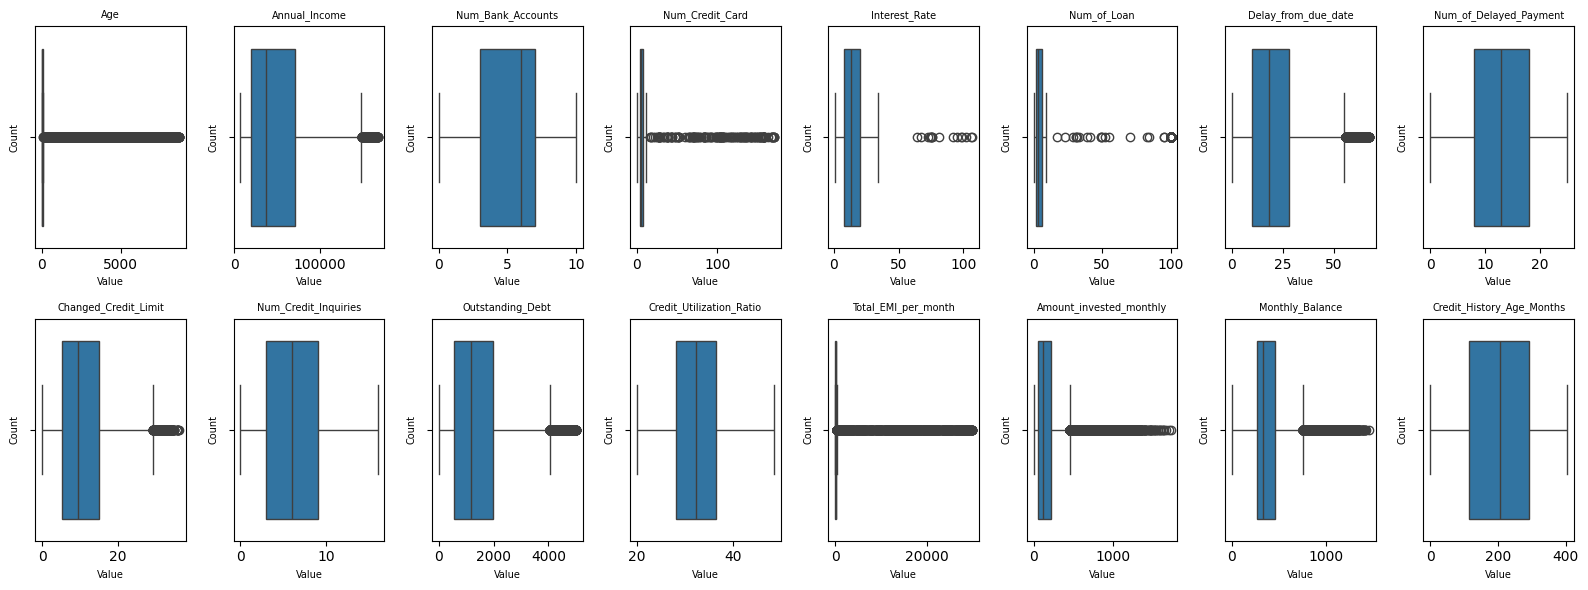

In [65]:
# Menampilkan Box plot numerik, serta Outlier yang bersih sehingga lebih mudah diolah
numeric_columns = datatrain.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=datatrain[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)
    axes[i].set_xlabel('Value', fontsize=7)
    axes[i].set_ylabel('Count', fontsize=7)

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Scaling**

Memberikan batasan nilai untuk kolom yang dipilih

In [66]:
datatrain = datatrain[datatrain['Age'] < 60]
datatrain = datatrain[datatrain['Num_Credit_Card'] <= 10]
datatrain = datatrain[datatrain['Interest_Rate'] <= 50]
datatrain = datatrain[datatrain['Num_of_Loan'] <= 12]
datatrain = datatrain[datatrain['Num_Bank_Accounts'] <= 10]
datatrain = datatrain[datatrain['Delay_from_due_date'] <= 60]
datatrain = datatrain[datatrain['Changed_Credit_Limit'] <= 30]
datatrain = datatrain[datatrain['Num_Credit_Inquiries'] <= 12]
datatrain = datatrain[datatrain['Total_EMI_per_month'] <= 200]
datatrain = datatrain[datatrain['Outstanding_Debt'] <= 1500]

**Encoding**

mengubah data dari satu bentuk  ke bentuk atau representasi lain sesuai dengan kebutuhan

In [67]:
datatrain.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Credit_History_Age_Months'],
      dtype='object')

In [68]:
categories = ['Poor', 'Standard', 'Good']
encoder = OrdinalEncoder(categories=[categories])
datatrain['Credit_Score_Encoded'] = encoder.fit_transform(datatrain[['Credit_Score']])

label_encoder = LabelEncoder()
datatrain['Occupation_Encoded'] = label_encoder.fit_transform(datatrain['Occupation'])

categories = ['Bad', 'Standard', 'Good']
encoder = OrdinalEncoder(categories=[categories])
datatrain['Credit_Mix_Encoded'] = encoder.fit_transform(datatrain[['Credit_Mix']])

categories_payment_behaviour = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]
encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])
datatrain['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(datatrain[['Payment_Behaviour']])


Memilih kolom yang tidak di encode

In [69]:
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
datatrain.drop(columns=columns_to_drop, inplace=True)

**Fitur Baru**

dapat meningkatkan akurasi dan mengurangi jumlah kesalahan.

In [70]:
# Menghitung jumlah akun (Bank Accounts + Credit Cards)

datatrain['Total_Num_Accounts'] = datatrain['Num_Bank_Accounts'] + datatrain['Num_Credit_Card']

# Menhgitung jumlah hutang per akun

datatrain['Debt_Per_Account'] = datatrain['Outstanding_Debt'] / datatrain['Total_Num_Accounts']

# Menghitung perbandingan hutang dengan pemasukan

datatrain['Debt_to_Income_Ratio'] = datatrain['Outstanding_Debt'] / datatrain['Annual_Income']

# Menghitung jumlah delayed payment per akun

datatrain['Delayed_Payments_Per_Account'] = datatrain['Num_of_Delayed_Payment'] / datatrain['Total_Num_Accounts']

# Menghitung pengeluaran bulanan (EMI + Monthly Investments)

datatrain['Total_Monthly_Expenses'] = datatrain['Total_EMI_per_month'] + datatrain['Amount_invested_monthly']

**MI Score**

Mencari variabel yang berguna untuk prediksi

In [71]:
categorical_columns = datatrain.select_dtypes(include=['object']).columns

data_encoded = datatrain.copy()

encoder = OrdinalEncoder()
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

mi_scores = mutual_info_classif(X, y)

for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

Feature 'Age': Mutual Information Score = 0.013811773342867317
Feature 'Annual_Income': Mutual Information Score = 0.42799610650659936
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.05370820375152485
Feature 'Num_Credit_Card': Mutual Information Score = 0.07226362806078446
Feature 'Interest_Rate': Mutual Information Score = 0.10322657288811121
Feature 'Num_of_Loan': Mutual Information Score = 0.01856476916174521
Feature 'Delay_from_due_date': Mutual Information Score = 0.06894148079985118
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.05030875766657528
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.10371883126014203
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.03389774255973266
Feature 'Outstanding_Debt': Mutual Information Score = 0.43007985465872456
Feature 'Credit_Utilization_Ratio': Mutual Information Score = 0.0008940600062685711
Feature 'Payment_of_Min_Amount': Mutual Information Score = 0.07584186579920904
Feature 'Total_E

In [72]:
sorted_mi_scores = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_mi_scores]
sorted_scores = [x[1] for x in sorted_mi_scores]

colorscale = 'Viridis'

fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Mutual Information Score', len=0.5, y=0.2)))])

fig.update_layout(title='Mutual Information Scores for Each Feature',
                  xaxis_title='Features',
                  yaxis_title='Mutual Information Score')

fig.show()

Dapat dilihat bahwa kolom yang memiliki pengaruh terhadap credit_score yaitu Annual Income dan Debt-to-Income Ratio

Serta yang berdampak negatif yaitu Outstanding Debt,Total EMI per Month, dan Interest Rate akan kita drop

In [73]:
columns_to_drop = [ 'Payment_of_Min_Amount', 'Age', 'Monthly_Balance', 'Total_Monthly_Expenses', 'Payment_Behaviour_Encoded', 'Amount_invested_monthly', 'Credit_Utilization_Ratio', 'Occupation_Encoded']
datatrain.drop(columns=columns_to_drop, inplace=True)

# **Model Dataset**

---
Model yang dipakai didataset saya yaitu Random Forest

Membagi data untuk untuk pengujian menggunakan data asli

In [74]:
y = datatrain['Credit_Score_Encoded']

X = datatrain[['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
       'Credit_History_Age_Months', 'Credit_Mix_Encoded', 'Total_Num_Accounts',
       'Debt_Per_Account', 'Debt_to_Income_Ratio', 'Delayed_Payments_Per_Account']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

**SMOTE**

SMOTE (Synthetic Minority Over-sampling Technique) adalah sebuah teknik resampling yang umum digunakan dalam analisis data yang tidak seimbang. Teknik ini bertujuan untuk menangani ketidakseimbangan kelas dengan membuat sampel sintetis dari kelas minoritas.

Membagi data menggunakan SMOTE

In [ ]:
smote_params = {
    'sampling_strategy': 'auto',
    'random_state': 77,
    'k_neighbors': 5,
    'n_jobs': -1
}

smote = SMOTE(**smote_params)

X_train = datatrain.drop('Credit_Score_Encoded', axis=1)
y_train = datatrain['Credit_Score_Encoded']

X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.15, random_state=77)

**Random Forest**

membuat dan melatih model Regresi Random Forest

In [76]:
model = RandomForestRegressor(n_estimators=500, bootstrap=True, random_state=77)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=77)

# **Evaluasi**

---
Melakukan evaluasi Model

In [77]:
print("Accuracy on training set:", rf_classifier.score(X_train_smote, y_train_smote))

y_pred_smote = rf_classifier.predict(X_test_smote)
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)

print("Accuracy on SMOTE test set:", accuracy_smote)

Accuracy on training set: 0.9995520990268333
Accuracy on SMOTE test set: 0.8960544531610521


 Menunjukan bahwa Random Forest memiliki akurasi dengan menggunakan data train SMOTE sebesar 89% dan data training  SMOTE sebesar 99%

**MSE**

Memberikan gambaran tentang seberapa baik model regresi dapat memprediksi nilai target dan membantu dalam mengevaluasi kinerja model tersebut.

In [78]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.02115070121081368


**Accuracy test**

menampilkan akurasi dan confussion matrix

Accuracy on original test set: 0.9697313046293299

Classification report for SMOTE test set:
               precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      2919
         1.0       0.88      0.84      0.86      2871
         2.0       0.89      0.92      0.90      2878

    accuracy                           0.90      8668
   macro avg       0.90      0.90      0.90      8668
weighted avg       0.90      0.90      0.90      8668


Classification report for original test set:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       901
         1.0       0.99      0.97      0.98      3810
         2.0       0.95      0.98      0.96      1467

    accuracy                           0.97      6178
   macro avg       0.96      0.97      0.97      6178
weighted avg       0.97      0.97      0.97      6178



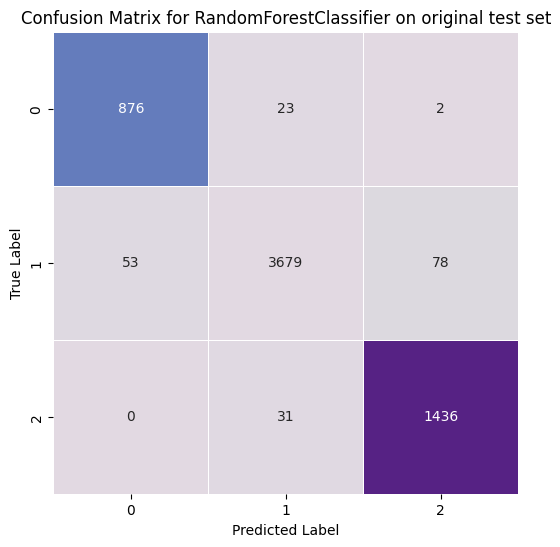

In [79]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on original test set:", accuracy)

matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, cbar=False, cmap='twilight', linewidth=0.5, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for RandomForestClassifier on original test set')

print('\nClassification report for SMOTE test set:\n', classification_report(y_test_smote, y_pred_smote))
print('\nClassification report for original test set:\n', classification_report(y_test, y_pred))

hasil output yang keluar bahwa  model pengujian menghasilkan akurasi sebesar 96% dengan persebaran seperti yang terlihat pada confussion matrix.

# **PENGUJIAN PADA DATA TEST**

# **Memuat Dataset**

---

In [80]:
#Lokasi Alamat CSV
url1 = "/content/drive/MyDrive/Machine Learning/Minggu 9/test.csv"

# Membaca file CSV
datatest = pd.read_csv(url1)
datatest.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


# **Membersihkan Dataset**

In [81]:
# Age / Loans / Delayed Payments
datatest['Age'] = datatest['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
datatest['Num_of_Loan'] = datatest['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
datatest['Num_of_Delayed_Payment'] = datatest['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int)

# Annual Income
datatest['Annual_Income'] = datatest['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
datatest['Annual_Income'] = datatest['Annual_Income'].astype(float)

# Credit Limit
datatest['Changed_Credit_Limit'] = datatest['Changed_Credit_Limit'].replace('_', np.nan)
datatest['Changed_Credit_Limit'] = pd.to_numeric(datatest['Changed_Credit_Limit'], errors='coerce')
datatest['Changed_Credit_Limit'] = datatest['Changed_Credit_Limit'].fillna(0)

# Outstanding Debt
# Convert data ke numeric
datatest['Outstanding_Debt'] = datatest['Outstanding_Debt'].astype(str)
datatest['Outstanding_Debt'] = datatest['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
datatest['Outstanding_Debt'] = pd.to_numeric(datatest['Outstanding_Debt'], errors='coerce')
datatest['Outstanding_Debt'] = datatest['Outstanding_Debt'].fillna(0)

# Monthly Investation
datatest['Amount_invested_monthly'] = datatest['Amount_invested_monthly'].astype(str)
datatest['Amount_invested_monthly'] = datatest['Amount_invested_monthly'].replace('', '0')
datatest['Amount_invested_monthly'] = datatest['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
datatest['Amount_invested_monthly'] = pd.to_numeric(datatest['Amount_invested_monthly'], errors='coerce')
datatest['Amount_invested_monthly'] = datatest['Amount_invested_monthly'].fillna(0)

# Monthly Balance
datatest['Monthly_Balance'] = datatest['Monthly_Balance'].astype(str)
datatest['Monthly_Balance'] = datatest['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
datatest['Monthly_Balance'] = pd.to_numeric(datatest['Monthly_Balance'], errors='coerce')
datatest['Monthly_Balance'] = datatest['Monthly_Balance'].fillna(0)

# Credit History Age
# Konversi datanya untuk konstruksi model lebih baik

def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0'
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0

datatest['Credit_History_Age_Months'] = datatest['Credit_History_Age'].apply(parse_years_and_months)

## **Data Entry Plus**

---

**Filtering**

In [82]:
datatest = datatest[datatest['Payment_Behaviour'] != '!@9#%8']
datatest = datatest[datatest['Occupation'] != '_______']
datatest = datatest[datatest['Credit_Mix'] != '_']

**Encoding**

In [83]:
label_encoder = LabelEncoder()
datatest['Occupation_Encoded'] = label_encoder.fit_transform(datatest['Occupation'])

In [84]:
categories = ['Bad', 'Standard', 'Good']
encoder = OrdinalEncoder(categories=[categories])

datatest['Credit_Mix_Encoded'] = encoder.fit_transform(datatest[['Credit_Mix']])

In [85]:
categories_payment_behaviour = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

datatest['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(datatest[['Payment_Behaviour']])

**New Features**

In [86]:
# Menjumlahkan jumlah akun yang dimiliki (Bank Accounts + Credit Cards)
datatest['Total_Num_Accounts'] = datatest['Num_Bank_Accounts'] + datatest['Num_Credit_Card']

# Menghitung outstanding debt untuk tiap akun
datatest['Debt_Per_Account'] = datatest['Outstanding_Debt'] / datatest['Total_Num_Accounts']

# Menghitung rasio outstanding debt dengan annual income
datatest['Debt_to_Income_Ratio'] = datatest['Outstanding_Debt'] / datatest['Annual_Income']

# Menghitung banyak delayed payment tiap akun
datatest['Delayed_Payments_Per_Account'] = datatest['Num_of_Delayed_Payment'] / datatest['Total_Num_Accounts']

# Menghitung pengeluaran tiap bulan (EMI + Monthly Investments)
datatest['Total_Monthly_Expenses'] = datatest['Total_EMI_per_month'] + datatest['Amount_invested_monthly']

Drop kolom yang tidak dipakai untuk diprediksi

In [87]:
columns_to_drop = [ 'Payment_of_Min_Amount', 'Age', 'Monthly_Balance', 'Total_Monthly_Expenses', 'Payment_Behaviour_Encoded',
                   'Amount_invested_monthly', 'Credit_Utilization_Ratio', 'Occupation_Encoded', 'ID', 'Customer_ID', 'Month',
                    'SSN', 'Credit_History_Age', 'Monthly_Inhand_Salary', 'Name', 'Type_of_Loan', 'Payment_Behaviour',
                    'Credit_Mix', 'Occupation']
datatest.drop(columns=columns_to_drop, inplace=True)

In [88]:
# Menghapus baris NaN value
datatest = datatest.dropna(axis = 0)

**Prediksi**

In [89]:
y_pred = rf_classifier.predict(datatest)

**Hasil Prediksi**

In [90]:
value_counts = pd.Series(y_pred).value_counts()
hasil = pd.DataFrame({'Credit Score': value_counts.index, 'Jumlah': value_counts.values})
hasil

,Credit Score,Jumlah
0,1.0,14676
1,0.0,12939
2,2.0,6193


didapatkan menggunakan model hasil latih dan menggunakan data train dapat memprediksi credit score pada data test dengan sebaran nilai (Standard) sebanyak 14.676
 data, nilai 2 (Good) sebanyak 12.939 data, dan nilai  (Bad) sebanyak 6193 data